<img src="mc.jpg" alt="mc">

***Ipotesi***
ad ogni round, il risultato del lancio di una moneta globale con probabilita'
$$Pr(testa) = Pr(croce) = \frac{1}{2}$$
e' comunicato a tutti i processi.

- $n = 3t + 1$: pocessi totali
- $t$: processi inaffidabili
- $n - t = 2t + 1$: processi affidabili
- $b(i) \in \{0, 1\}$: valore del *bit* dell'$i$-esimo processo per $i = 1, ..., n$
- $v$: valore su cui gli $n - t$ processi affidabili raggiungono il consenso 


***Consenso***  
i bit dei processi affidabili assumono tutti lo stesso valore, ovvero, dopo un certo numero
di round, se $i$ e un processo affidabile $b(i) = v$.  
***Validita'***  
Se il valore inziale di tutti i processi affidabili e lo stesso, e uguale a $v_0$, allora $v = v_0$
(questa condizione impedisce la soluzione banale fissata a priori quale, per esempio, $v = 0$).

Quindi, il consenso viene raggiunto se tutti gli $n - t$ processi affidabili hanno lo stesso valore

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

def pretty_print(l):
    print("[")
    for i in l:
        print("\t" + str(i) + ",")
    print("]")

In [7]:
n = 4
t = 1

def init_gens():
    # Gli unici split interessanti sono quelli 2:1
    splits = [
        [0, 0, 1],
        [0, 1, 1],
        [0, 1, 0],
        [1, 0, 1],
        [1, 0, 0],
        [1, 1, 0]
    ]

    split_choice = random.choice(splits)

    gens = [
        [split_choice[0], 0, 0, 0],
        [0, split_choice[1], 0, 0],
        [0, 0, split_choice[2], 0],
    ]

    return gens

gens = init_gens()
print("matrice di partenza: ")
pretty_print(gens)

matrice di partenza: 
[
	[1, 0, 0, 0],
	[0, 1, 0, 0],
	[0, 0, 0, 0],
]


# `Algoritmo`

l'algoritmo di tipo montecarlo e' il seguente:

```py
while not consenso:
    per ogni processo i:
        1. invia b(i) ad ogni altro processo
        2. ricevi dagli altri processi
        3. calcola maj(i)
        4. calcola tally(i)
        5. if tally >= 2*t + 1 = n - t:
            b(i) = maj(i)
           elif coin == testa:
            b(i) = 1
           else:
            b(i) = 0
```

In [8]:
def consensus(gens):
    value = gens[0][0]
    for i in range(len(gens)):
        if gens[i][i] != value:
            return False
    return True

def maj_tally(gens, gen_row):
    n_ones = gens[gen_row].count(1)
    n_zeros = gens[gen_row].count(0)

    maj = 1 if n_ones > n_zeros else 0
    tally = n_ones if maj == 1 else n_zeros
    
    return maj, tally

def round(gens):
    coin = random.randint(0, 1)
    # Invio dei messaggi
    for i in range(len(gens)):
        for j in range(len(gens)):
            gens[i][j] = gens[j][j]
        gens[i][3] = 1 - gens[i][i] # processo inaffidabile

    for i in range(len(gens)):
        maj, tally = maj_tally(gens, i)

        if tally >= n - t:
            gens[i][i] = maj
        else:
            gens[i][i] = coin


In [9]:

n_rounds = 0
rounds = []
iters = 1024

for _ in range(iters):
    gens = init_gens()
    n_rounds = 0
    while not consensus(gens):
        round(gens)
        n_rounds += 1
    rounds.append(n_rounds)

l' accordo e' stato raggiunto in 1 rounds per 508 volte
l' accordo e' stato raggiunto in 2 rounds per 269 volte
l' accordo e' stato raggiunto in 3 rounds per 115 volte
l' accordo e' stato raggiunto in 4 rounds per 64 volte
l' accordo e' stato raggiunto in 5 rounds per 34 volte
l' accordo e' stato raggiunto in 6 rounds per 16 volte
l' accordo e' stato raggiunto in 7 rounds per 13 volte
l' accordo e' stato raggiunto in 8 rounds per 2 volte
l' accordo e' stato raggiunto in 9 rounds per 2 volte
l' accordo e' stato raggiunto in 10 rounds per 1 volte


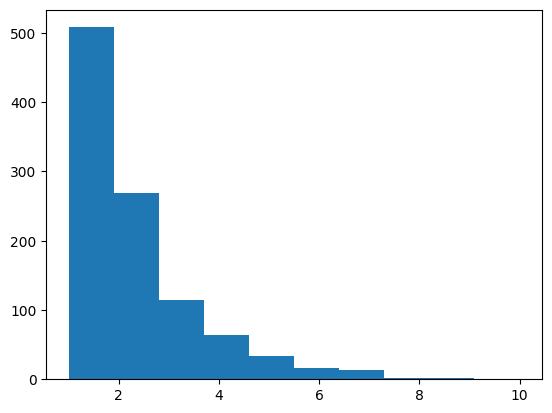

In [10]:
plt.hist(rounds)

for i in list(set(rounds)): # per togliere i duplicati
    print(f"l' accordo e' stato raggiunto in {i} rounds per {rounds.count(i)} volte")

La probabilita' di trovare il consenso al round $r$, con $r = 1,...,round$ e' circa $\frac{R}{2^r}$ perche', in uno split 2 a 1, le valori possibili sono:
- $[0, 0, 1]$  
- $[0, 1, 1]$  
- $[0, 1, 0]$  
- $[1, 0, 1]$  
- $[1, 1, 0]$

In base ai possibili split, il consenso verra' ottenuto in un round diverso con diverse probabilta'. Per esempio, usando lo split $[1, 0, 0]$ nel caso di $n=4$ e $t=1$:

al primo round non si entra mai nel caso in cui $tally(i) \ge 2t + 1$, perche' e' sempre 2 (come in questo caso, $maj(i) = 0, tally(i) = 2$), pero' si potrebbe uscire al lancio della moneta, perche' su $[1, 0, 0]$, se uscisse $croce = 0$, allora si sarebbe raggiunto il consenso e quindi si terminerebbe con $v = 0$.

In generale, al 4o round non ci si arriva quasi mai perche' si avrebbero abbastanza dati per trovare una decisione unanime. In ogni caso, la probabilita' di terminare con il consenso all'round $r$ e' $(\frac{1}{2})^r = \frac{1}{2^r}$ (questo perche' negli split 2 a 1 la moneta verrebbe lanciata $r$ volte con probabilita' $\frac{1}{2}$ di raggiungere il consenso). Adesso non resta che calcolare casi favorevoli su casi possibili:
$$\frac{\frac{1}{2^r}}{R} = \frac{R}{2^r}$$